In [41]:
# ====================================
# Notebook 9: SKU Count Analysis Before and After Recommendations
# Description:
# This notebook reads a JSON file of orders and compares SKU counts per order
# for two time periods: before and after the recommendation system integration.
# It visualizes SKU count distributions and reports the average SKU change.
# ====================================

In [42]:
import os

# === Clone GitHub repository ===
repo_dir = "My-BS-Thesis"

if os.path.exists(repo_dir):
    print(f"{repo_dir} already exists. Removing it...\n")
    !rm -r {repo_dir}

!git clone https://github.com/Goshmar/My-BS-Thesis

Cloning into 'My-BS-Thesis'...
remote: Enumerating objects: 223, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 223 (delta 13), reused 5 (delta 5), pack-reused 201 (from 1)
Receiving objects: 100% (223/223), 224.39 MiB | 29.24 MiB/s, done.
Resolving deltas: 100% (85/85), done.


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import zipfile
import json

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [53]:
# === Install dependencies from requirements.txt ===
!pip install -r My-BS-Thesis/requirements.txt -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 82.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.7/557.7 MB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.2/160.2 kB 58.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.3/27.3 MB 110.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 768.5/768.5 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 69.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 76.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.5/102.5 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 kB 3.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproje

In [46]:
# === Set paths ===
interim_data_dir = os.path.join(repo_dir, 'data', 'processed')
json_path = os.path.join(interim_data_dir, 'rec_orders.json')

artifacts_dir = os.path.join(repo_dir, 'artifacts')
visualizations_dir = os.path.join(artifacts_dir, 'visualizations')

os.makedirs(visualizations_dir, exist_ok=True)

In [47]:
# === Load JSON data ===
with open(json_path, "r", encoding="utf-8") as f:
    lines = f.readlines()

orders = [json.loads(line) for line in lines]

In [55]:
# === Parse into DataFrame ===
data = []
for order in orders:
    date_str = order["дата"]
    date_obj = datetime.strptime(date_str, "%d.%m.%Y %H:%M:%S")
    sku_count = len(order["товары"])
    period = "before" if date_obj < datetime(2025, 2, 17) else "after"
    data.append({
        "order_id": order["заказ"],
        "date": date_obj,
        "sku_count": sku_count,
        "period": period
    })

df = pd.DataFrame(data)

# === Calculate average SKU count per period ===
avg_sku_before = df[df["period"] == "before"]["sku_count"].mean()
avg_sku_after = df[df["period"] == "after"]["sku_count"].mean()

count_before = df[df["period"] == "before"].shape[0]
count_after = df[df["period"] == "after"].shape[0]

print(f"Total orders BEFORE integration: {count_before}")
print(f"Total orders AFTER integration: {count_after}")

print(f"Average SKU per order BEFORE integration: {avg_sku_before:.3f}")
print(f"Average SKU per order AFTER integration: {avg_sku_after:.3f}")
print(f"Relative increase: {((avg_sku_after - avg_sku_before) / avg_sku_before) * 100:.3f}%")

Total orders BEFORE integration: 306
Total orders AFTER integration: 296
Average SKU per order BEFORE integration: 9.784
Average SKU per order AFTER integration: 10.534
Relative increase: 7.660%


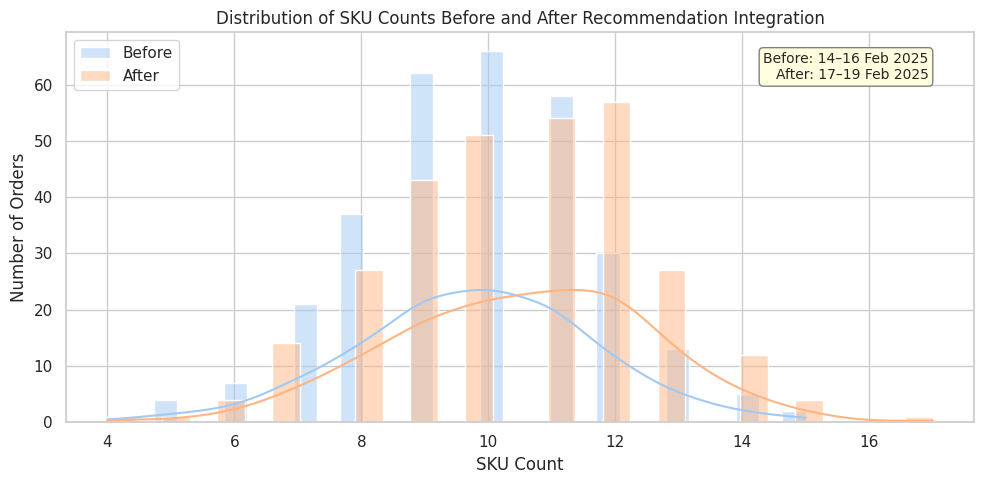

In [56]:
sns.set(style="whitegrid", palette="pastel")

# === Plot 1: Distribution of SKU counts ===
plt.figure(figsize=(10, 5))
sns.histplot(df[df["period"] == "before"]["sku_count"], label="Before", kde=True, bins=30)
sns.histplot(df[df["period"] == "after"]["sku_count"], label="After", kde=True, bins=30)
plt.title("Distribution of SKU Counts Before and After Recommendation Integration")
plt.xlabel("SKU Count")
plt.ylabel("Number of Orders")
plt.legend()
plt.grid(True)
plt.annotate("Before: 14–16 Feb 2025\nAfter: 17–19 Feb 2025", xy=(0.95, 0.95),
             xycoords='axes fraction', ha='right', va='top', fontsize=10,
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow", edgecolor="gray"))
plt.tight_layout()
plt.savefig(os.path.join(visualizations_dir, "sku_histogram.png"), dpi=300, bbox_inches='tight')
plt.show()

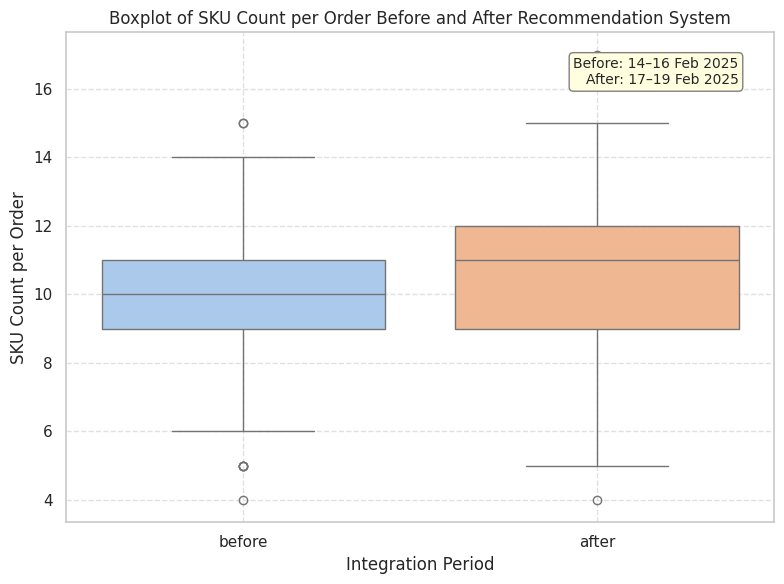

In [57]:
# === Plot 2: Boxplot ===
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='period', y='sku_count', hue='period', palette='pastel', legend=False)
plt.title("Boxplot of SKU Count per Order Before and After Recommendation System")
plt.xlabel("Integration Period")
plt.ylabel("SKU Count per Order")
plt.grid(True, linestyle='--', alpha=0.6)
plt.annotate("Before: 14–16 Feb 2025\nAfter: 17–19 Feb 2025", xy=(0.95, 0.95),
             xycoords='axes fraction', ha='right', va='top', fontsize=10,
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow", edgecolor="gray"))
plt.tight_layout()
plt.savefig(os.path.join(visualizations_dir, "sku_boxplot.png"), dpi=300, bbox_inches='tight')
plt.show()